In [14]:
from PIL import Image

Image.open("chinese_landscape_painting/harvard_0.jpg", "r").resize((64, 64)).show()

In [16]:
import numpy as np

def make_train_image(samples: np.array, n: int = 10):
    _, h, w, c = samples.shape
    mega_image = np.zeros((h, w, c))
    for i in range(n):
        mega_image[0:h, w * i : w * (i + 1), :] = samples[i]
    return mega_image.transpose(1, 2, 0)

In [23]:
import torch
from torchvision.datasets import CIFAR10


class ArtBench10(CIFAR10):
    base_folder = "artbench-10-batches-py"
    url = "https://artbench.eecs.berkeley.edu/files/artbench-10-python.tar.gz"
    filename = "artbench-10-python.tar.gz"
    tgz_md5 = "9df1e998ee026aae36ec60ca7b44960e"
    train_list = [
        ["data_batch_1", "c2e02a78dcea81fe6fead5f1540e542f"],
        ["data_batch_2", "1102a4dcf41d4dd63e20c10691193448"],
        ["data_batch_3", "177fc43579af15ecc80eb506953ec26f"],
        ["data_batch_4", "566b2a02ccfbafa026fbb2bcec856ff6"],
        ["data_batch_5", "faa6a572469542010a1c8a2a9a7bf436"],
    ]

    test_list = [
        ["test_batch", "fa44530c8b8158467e00899609c19e52"],
    ]
    meta = {
        "filename": "meta",
        "key": "styles",
        "md5": "5bdcafa7398aa6b75d569baaec5cd4aa",
    }
    
    def __getitem__(self, index: int):
        img, target = self.data[index], int(self.targets[index])

        return torch.from_numpy(img).to(torch.int32), target

In [24]:
dataset = ArtBench10("artbench10", download=True)

Files already downloaded and verified


In [33]:
dataset[0][0].numpy().shape

(32, 32, 3)

In [34]:
IMAGE_SZ=32
plt.imshow(dataset[3][0])

TypeError: transpose() received an invalid combination of arguments - got (int, int, int), but expected one of:
 * (int dim0, int dim1)
 * (name dim0, name dim1)


In [3]:
all_data["data"].shape

(10000, 3072)

In [7]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

selected = []
for i in range(len(all_data["labels"])):
    if all_data["labels"][i] == 6:
        selected.append(all_data["data"][i])

selected = np.stack(selected)
print(selected.shape)

NameError: name 'all_data' is not defined

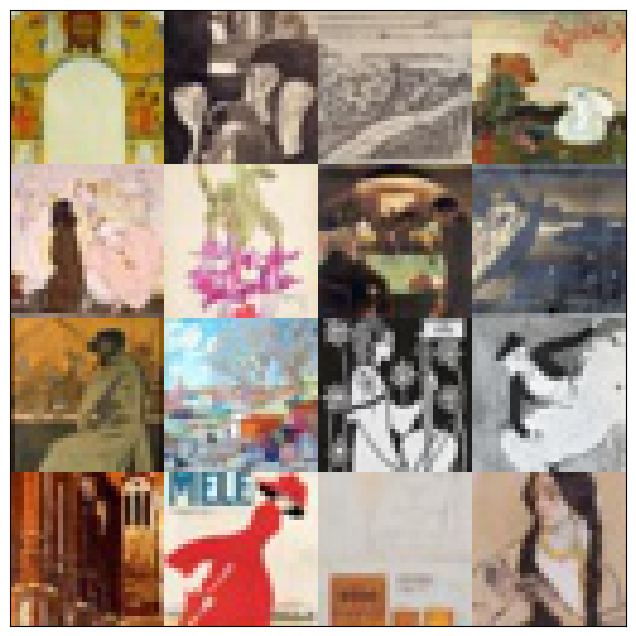

In [6]:
IMAGE_SZ = 32


def show_random_images(n=1):
    sqrt_n = int(math.sqrt(n))
    assert sqrt_n == math.sqrt(n)
    ids = np.random.randint(0, selected.shape[0], n)
    mega_image = np.zeros((IMAGE_SZ * sqrt_n, IMAGE_SZ * sqrt_n, 3))
    for idx, image_idx in enumerate(ids):
        i = idx // sqrt_n
        j = idx % sqrt_n
        image = selected[image_idx].reshape(3, IMAGE_SZ, IMAGE_SZ).transpose(1, 2, 0)
        mega_image[i * IMAGE_SZ : (i + 1) * IMAGE_SZ, j * IMAGE_SZ : (j + 1) * IMAGE_SZ, :] = image

    return mega_image


mega_image = show_random_images(16)
plt.figure(figsize=(8, 8))
plt.imshow(mega_image / mega_image.max())
plt.xticks([])
plt.yticks([])
plt.show()

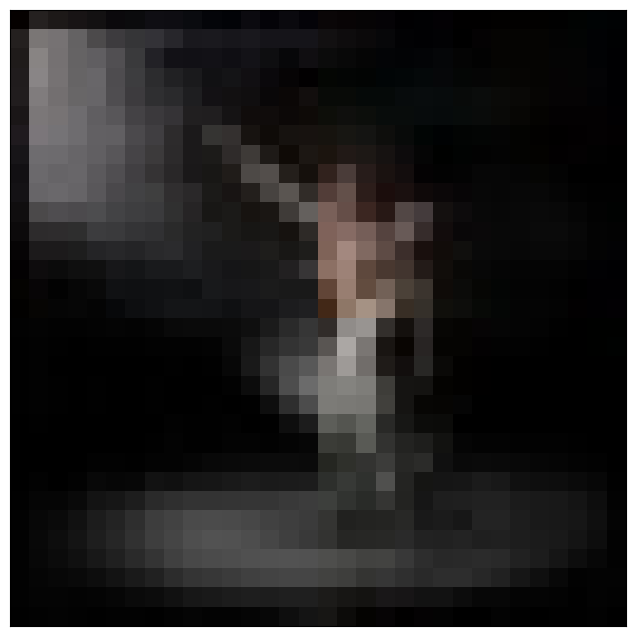

In [64]:
plt.figure(figsize=(8, 8))
plt.imshow(d["data"][100].reshape(3, IMAGE_SZ, IMAGE_SZ).transpose(1, 2, 0) / d["data"][0].max())
plt.xticks([])
plt.yticks([])
plt.show()